In [1]:
import pandas as pd
import numpy as np
import math
import time
import random
import re
from PIL import Image
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
from libsvm.svmutil import *
from pathlib import Path

In [2]:
class0 = list()
path0 = 'svm/train/1/'
for image in Path(path0).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    class0.append(image_resized)
label0 = np.array(class0) 

class1 = list()
path1 = 'svm/train/2/'
for image in Path(path1).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    class1.append(image_resized)
label1 = np.array(class1) 

In [3]:
y0 = np.full((2380, 1), fill_value=-1, dtype='double')
y1 = np.ones((2380, 1), dtype='double')
y = np.concatenate((y0, y1))

x = np.concatenate((label0, label1))

In [25]:
"""def norm_square(x, z):
    s = 0
    for i in range(0, x.shape[0]):
        s += abs(x[i]-z[i])**2
    return math.sqrt(s)"""

P = np.empty((4760, 4760), dtype='double')
gamma = 0.001
for i in range(0, 4760):
    for j in range(0, 4760):
        P[i][j] = y[i][0]*y[j][0]*np.exp(-gamma * np.linalg.norm(np.asarray(x[i])-np.asarray(x[j])))

q = np.full((4760, 1), fill_value=-1, dtype='double')
c = 1
G = np.concatenate((np.identity(4760, dtype='double'), np.identity(4760, dtype='double')*(-1)))
h = np.concatenate((np.full((4760, 1), fill_value=c, dtype='double'), np.zeros((4760, 1), dtype='double')))
A = y.reshape((1, 4760))
b = np.zeros((1,1), dtype='double')

print(P)
print(q)
print(G)
print(h)
print(A)
print(b)

[[ 1.          0.99319536  0.99438674 ... -0.98317011 -0.98697999
  -0.99052009]
 [ 0.99319536  1.          0.99565152 ... -0.98581907 -0.98984812
  -0.99343056]
 [ 0.99438674  0.99565152  1.         ... -0.9861354  -0.99011472
  -0.9937526 ]
 ...
 [-0.98317011 -0.98581907 -0.9861354  ...  1.          0.99109502
   0.98918021]
 [-0.98697999 -0.98984812 -0.99011472 ...  0.99109502  1.
   0.99315141]
 [-0.99052009 -0.99343056 -0.9937526  ...  0.98918021  0.99315141
   1.        ]]
[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [-0. -0. -0. ... -1. -0. -0.]
 [-0. -0. -0. ... -0. -1. -0.]
 [-0. -0. -0. ... -0. -0. -1.]]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
[[-1. -1. -1. ...  1.  1.  1.]]
[[0.]]


In [26]:
sol = solvers.qp(matrix(P), matrix(q), matrix(G), matrix(h), matrix(A), matrix(b))

     pcost       dcost       gap    pres   dres
 0: -1.4242e+03 -1.2123e+04  6e+04  3e+00  7e-13
 1: -9.2384e+02 -7.9146e+03  7e+03  2e-02  9e-13
 2: -1.1932e+03 -2.1790e+03  1e+03  3e-03  8e-13
 3: -1.4109e+03 -1.7887e+03  4e+02  9e-04  8e-13
 4: -1.4938e+03 -1.6582e+03  2e+02  3e-04  8e-13
 5: -1.5291e+03 -1.6065e+03  8e+01  1e-04  8e-13
 6: -1.5480e+03 -1.5797e+03  3e+01  5e-05  8e-13
 7: -1.5559e+03 -1.5688e+03  1e+01  2e-05  8e-13
 8: -1.5602e+03 -1.5632e+03  3e+00  3e-06  8e-13
 9: -1.5614e+03 -1.5618e+03  4e-01  2e-07  9e-13
10: -1.5616e+03 -1.5616e+03  9e-03  4e-09  9e-13
11: -1.5616e+03 -1.5616e+03  2e-04  7e-11  9e-13
Optimal solution found.


In [27]:
optimal_alpha = np.array(sol['x'])
print(optimal_alpha[optimal_alpha<0.0001].shape)

(2704,)


In [28]:
alpha = np.where(optimal_alpha<0.0001, 0, optimal_alpha)
print(np.count_nonzero(alpha))
print(np.count_nonzero(alpha)/4760)

2056
0.4319327731092437


In [29]:
linear_sv = [18,   23,   24,   25,   28,   31,   35,   43,   50,   56,   57,
         68,   72,   81,   85,   96,  102,  110,  113,  125,  129,  140,
        146,  147,  153,  155,  157,  167,  169,  181,  187,  203,  204,
        206,  246,  249,  255,  260,  272,  275,  277,  282,  284,  299,
        307,  325,  364,  381,  382,  387,  396,  402,  418,  419,  421,
        435,  438,  439,  453,  454,  456,  458,  474,  486,  491,  497,
        511,  516,  518,  523,  538,  545,  552,  553,  562,  566,  569,
        571,  588,  591,  598,  605,  615,  621,  629,  631,  635,  640,
        650,  651,  689,  690,  697,  701,  705,  740,  747,  750,  755,
        774,  787,  791,  796,  817,  821,  822,  826,  830,  839,  865,
        866,  874,  877,  880,  888,  891,  892,  893,  901,  904,  905,
        908,  913,  916,  917,  922,  926,  927,  933,  937,  939,  946,
        960,  963,  965,  971,  972,  973,  987,  999, 1014, 1020, 1040,
       1045, 1052, 1064, 1094, 1096, 1098, 1103, 1106, 1109, 1111, 1119,
       1129, 1140, 1151, 1155, 1163, 1172, 1178, 1182, 1183, 1186, 1188,
       1207, 1233, 1237, 1242, 1247, 1248, 1251, 1255, 1261, 1267, 1269,
       1270, 1272, 1275, 1277, 1302, 1305, 1309, 1312, 1329, 1331, 1338,
       1351, 1368, 1370, 1394, 1395, 1418, 1427, 1429, 1436, 1441, 1445,
       1446, 1452, 1456, 1465, 1475, 1480, 1490, 1491, 1506, 1515, 1521,
       1522, 1523, 1529, 1537, 1541, 1543, 1551, 1556, 1557, 1558, 1563,
       1565, 1583, 1596, 1598, 1601, 1603, 1606, 1612, 1614, 1631, 1640,
       1641, 1653, 1656, 1663, 1665, 1666, 1678, 1681, 1691, 1695, 1698,
       1709, 1714, 1715, 1719, 1725, 1738, 1745, 1752, 1753, 1757, 1761,
       1771, 1773, 1779, 1789, 1799, 1804, 1808, 1815, 1816, 1825, 1838,
       1842, 1854, 1857, 1863, 1871, 1874, 1876, 1897, 1908, 1911, 1914,
       1927, 1939, 1942, 1955, 1972, 1977, 1995, 2000, 2021, 2026, 2038,
       2046, 2054, 2061, 2067, 2069, 2072, 2074, 2080, 2090, 2096, 2100,
       2102, 2107, 2117, 2119, 2128, 2133, 2158, 2169, 2172, 2179, 2202,
       2226, 2235, 2236, 2251, 2259, 2264, 2271, 2278, 2279, 2290, 2296,
       2307, 2310, 2322, 2325, 2329, 2331, 2343, 2347, 2356, 2367, 2369,
       2374, 2377, 2381, 2398, 2409, 2410, 2412, 2414, 2417, 2428, 2429,
       2432, 2433, 2439, 2441, 2443, 2453, 2456, 2461, 2467, 2469, 2481,
       2483, 2497, 2504, 2505, 2506, 2507, 2515, 2520, 2536, 2542, 2552,
       2565, 2575, 2576, 2595, 2599, 2609, 2617, 2624, 2629, 2631, 2636,
       2641, 2643, 2649, 2650, 2655, 2659, 2664, 2672, 2687, 2688, 2694,
       2697, 2698, 2707, 2713, 2721, 2736, 2748, 2750, 2752, 2755, 2775,
       2795, 2802, 2818, 2822, 2836, 2852, 2859, 2862, 2867, 2880, 2887,
       2888, 2898, 2901, 2910, 2911, 2921, 2923, 2924, 2932, 2933, 2945,
       2949, 2960, 2969, 2977, 2979, 2989, 2992, 2995, 2998, 3012, 3016,
       3018, 3020, 3025, 3026, 3032, 3040, 3041, 3042, 3045, 3053, 3058,
       3066, 3068, 3069, 3081, 3082, 3087, 3092, 3093, 3120, 3124, 3129,
       3130, 3141, 3142, 3154, 3162, 3168, 3172, 3176, 3182, 3184, 3187,
       3188, 3199, 3224, 3231, 3232, 3239, 3258, 3265, 3277, 3283, 3288,
       3293, 3294, 3295, 3303, 3304, 3326, 3353, 3355, 3357, 3359, 3366,
       3367, 3371, 3389, 3400, 3403, 3406, 3408, 3414, 3415, 3417, 3436,
       3440, 3449, 3454, 3459, 3464, 3474, 3486, 3496, 3502, 3510, 3512,
       3518, 3539, 3545, 3548, 3552, 3560, 3566, 3574, 3580, 3582, 3585,
       3608, 3629, 3636, 3639, 3640, 3651, 3671, 3675, 3676, 3682, 3683,
       3701, 3704, 3705, 3710, 3711, 3720, 3723, 3726, 3728, 3732, 3734,
       3741, 3744, 3745, 3747, 3753, 3762, 3766, 3775, 3777, 3780, 3792,
       3797, 3802, 3830, 3839, 3847, 3852, 3859, 3868, 3882, 3893, 3894,
       3902, 3903, 3920, 3929, 3940, 3947, 3948, 3950, 3952, 3958, 3966,
       3971, 3978, 3991, 3992, 4005, 4013, 4020, 4022, 4025, 4039, 4058,
       4062, 4070, 4087, 4088, 4092, 4105, 4106, 4109, 4119, 4133, 4156,
       4159, 4172, 4175, 4177, 4184, 4189, 4190, 4216, 4231, 4232, 4242,
       4243, 4248, 4277, 4290, 4311, 4322, 4331, 4333, 4345, 4349, 4351,
       4363, 4364, 4374, 4377, 4384, 4390, 4393, 4401, 4406, 4410, 4415,
       4420, 4429, 4432, 4433, 4442, 4455, 4463, 4474, 4483, 4488, 4494,
       4499, 4501, 4512, 4519, 4520, 4524, 4545, 4554, 4556, 4559, 4568,
       4569, 4591, 4604, 4620, 4621, 4632, 4640, 4646, 4650, 4653, 4659,
       4683, 4685, 4687, 4690, 4702, 4707, 4711, 4740, 4745, 4746]

temp_arr = alpha
gaussian_sv = np.asarray(temp_arr.reshape(4760, )!=0).nonzero()

intersection = list(set(linear_sv) & set(gaussian_sv[0].tolist()))
print(len(intersection), intersection)

629 [2054, 4105, 4106, 2061, 4109, 18, 2067, 2069, 4119, 2072, 23, 24, 25, 2074, 28, 31, 2080, 35, 4133, 2090, 43, 2096, 50, 2100, 2102, 56, 57, 2107, 4156, 4159, 68, 2119, 72, 4172, 2128, 81, 4177, 85, 2133, 4184, 4189, 4190, 96, 110, 2158, 113, 4216, 2169, 2172, 125, 129, 2179, 4231, 4232, 140, 146, 147, 4242, 4243, 4248, 153, 2202, 157, 167, 169, 2226, 181, 187, 2235, 2236, 4290, 203, 2251, 206, 4311, 2264, 2271, 4322, 2278, 2279, 4331, 4333, 2290, 246, 2296, 249, 4345, 4349, 255, 4351, 2307, 260, 2310, 4363, 4364, 272, 2322, 275, 277, 2325, 4374, 2329, 282, 2331, 4377, 4384, 4390, 2343, 4393, 299, 2347, 4401, 307, 2356, 4406, 4410, 2367, 4415, 2369, 4420, 325, 2374, 2377, 2381, 4429, 4432, 4433, 4442, 4455, 2409, 364, 2412, 2414, 4463, 2417, 4474, 2428, 381, 382, 2429, 2432, 2433, 387, 4483, 2439, 2441, 2443, 396, 4494, 402, 4499, 2453, 4501, 2456, 2461, 4512, 418, 419, 2467, 421, 2469, 4519, 4520, 4524, 2481, 435, 2483, 438, 439, 2497, 4545, 453, 454, 456, 2504, 2505, 2506, 2507, 

In [30]:
temp = np.empty((4760, 4760))
for i in range(0, 4760):
    for j in range(0, 4760):
        temp[i][j] = alpha[i][0]*y[i][0]*np.exp(-gamma * np.linalg.norm(np.asarray(x[i])-np.asarray(x[j])))
train_wTx = np.asarray(np.sum(temp, axis=0))
print(train_wTx)

[-2.22369495 -1.62371126 -1.47503038 ...  1.14443094  0.76966608
 -0.10058142]


In [31]:
all_b = train_wTx.reshape((4760, 1))
b = -0.5*(np.max(all_b[np.where(y==-1) and np.where(alpha!=0)], axis=0) + np.min(all_b[np.where(y==1) and np.where(alpha!=0)], axis=0))
print(b)

0.6123918236040404


In [32]:
vclass0 = list()
vpath0 = 'svm/val/1/'
for image in Path(vpath0).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    vclass0.append(image_resized)
vlabel0 = np.array(vclass0) 

vclass1 = list()
vpath1 = 'svm/val/2/'
for image in Path(vpath1).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    vclass1.append(image_resized)
vlabel1 = np.array(vclass1)

vy0 = np.full((vlabel0.shape[0], 1), fill_value=-1, dtype='double')
vy1 = np.ones((vlabel1.shape[0], 1), dtype='double')
vy = np.concatenate((vy0, vy1))

vx = np.concatenate((vlabel0, vlabel1))

vtemp = np.empty((x.shape[0], vx.shape[0]))
for i in range(0, x.shape[0]):
    for j in range(0, vx.shape[0]):
        vtemp[i][j] = alpha[i][0]*y[i][0]*np.exp(-gamma * np.linalg.norm(np.asarray(x[i])-np.asarray(vx[j])))
valid_wTx = np.asarray(np.sum(vtemp, axis=0))
print(valid_wTx)

[-2.02428543e+00 -2.06968203e+00 -9.09594237e-01  4.79334762e-01
 -8.29841661e-01 -7.48966606e-01 -2.11957127e+00 -1.97385962e+00
 -1.11370788e+00 -1.12310313e-01 -2.16623654e+00 -8.67793744e-01
 -2.19242669e+00 -1.91286057e+00 -1.64218046e+00 -7.03894496e-02
 -1.49945122e+00 -1.94263813e+00 -9.76784355e-01 -2.26537723e+00
 -1.89623073e+00 -2.18308175e+00 -1.32600511e+00 -4.26367914e-01
 -2.01652612e+00 -2.02986989e+00 -1.77131552e+00 -2.23308646e+00
 -1.42545513e+00 -1.14292582e+00 -1.62593975e+00 -1.73427695e+00
 -1.71419039e+00 -1.92350609e+00 -2.11041218e+00 -1.84929250e+00
 -2.11079051e+00 -1.75082242e+00 -1.94354446e+00 -2.21076304e+00
 -6.41500923e-01 -1.76137136e+00 -1.58131536e+00 -6.47830953e-01
 -1.37535869e+00 -2.02909236e+00 -2.24903854e+00 -1.87486868e+00
 -1.73823710e+00 -2.10531533e+00 -1.28183219e+00 -2.42373802e+00
 -7.66559987e-01 -3.50164129e-01 -2.02533192e+00 -1.42510618e+00
 -1.91744669e+00 -9.89602403e-01 -2.24090554e+00 -1.15082856e+00
 -1.68101029e+00 -1.58188

In [33]:
y_pred = list()
for i in range(0, vy.shape[0]):
    val = 1 if(valid_wTx[i] + b)>0 else (-1)
    y_pred.append(val)

count = 0
for i in range(0, vy.shape[0]):
    count = count+1 if(vy[i][0]==y_pred[i]) else count
accuracy = count/len(y_pred)
print(accuracy)

0.915


svm/train/1/10007.jpg


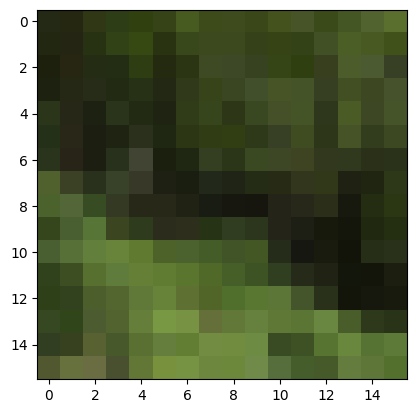

svm/train/2/12425.jpg


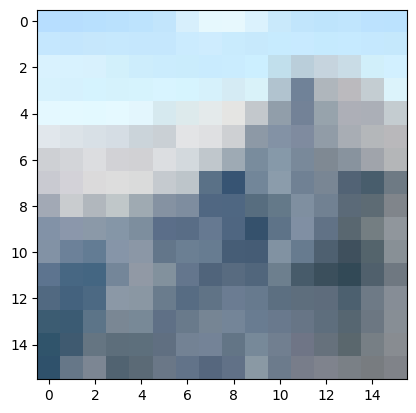

svm/train/2/1243.jpg


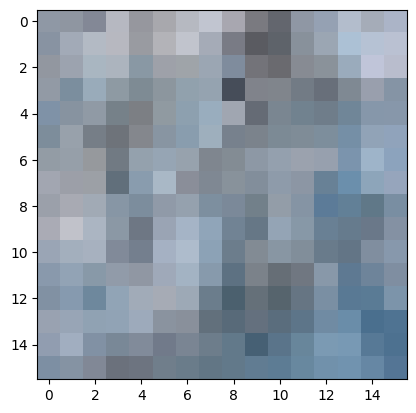

svm/train/2/12473.jpg


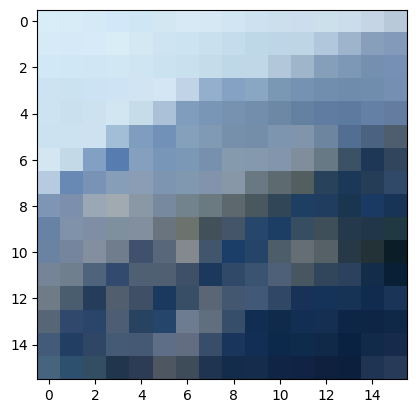

svm/train/2/12478.jpg


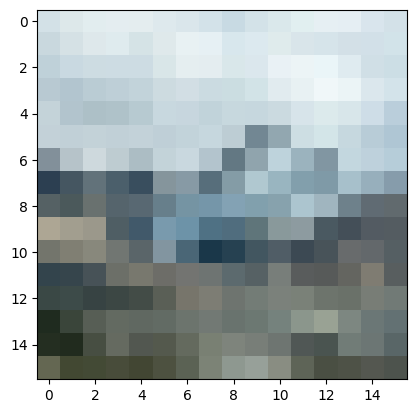

svm/train/2/12482.jpg


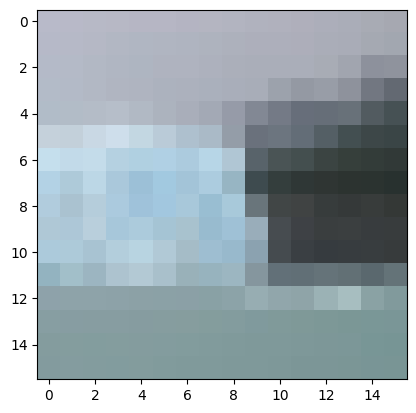

In [34]:
image_names = list()
path0 = 'svm/train/1/'
for image in Path(path0).glob('*.jpg'):
    image_names.append(image)
path1 = 'svm/train/2/'
for image in Path(path1).glob('*.jpg'):
    image_names.append(image)

image_name = np.asarray(image_names)

indices = np.array(alpha.reshape((4760,)).argsort()[:6]).reshape((6, 1))
for i in range(0, indices.shape[0]):
    image = str(image_name[indices[i]]).split('\'')[1]
    print(image)
    img = Image.open(image, mode='r').resize((16, 16))
    plt.imshow(img)
    plt.show()

In [35]:
print(gaussian_sv[0].tolist())

[1, 2, 5, 9, 14, 16, 17, 18, 23, 24, 25, 26, 28, 31, 34, 35, 39, 43, 45, 46, 49, 50, 54, 56, 57, 62, 64, 65, 67, 68, 69, 72, 73, 74, 77, 78, 79, 81, 82, 85, 91, 93, 94, 95, 96, 99, 103, 104, 106, 108, 110, 112, 113, 117, 125, 129, 133, 135, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 150, 151, 153, 154, 157, 158, 160, 163, 167, 169, 171, 177, 178, 181, 184, 187, 193, 198, 200, 203, 205, 206, 208, 209, 211, 213, 217, 218, 219, 221, 223, 230, 231, 233, 238, 239, 240, 246, 249, 250, 252, 253, 255, 257, 259, 260, 262, 263, 264, 267, 269, 272, 273, 274, 275, 277, 279, 280, 281, 282, 285, 289, 290, 293, 294, 299, 301, 304, 307, 310, 312, 313, 314, 315, 320, 321, 323, 324, 325, 330, 332, 337, 338, 342, 344, 345, 348, 350, 352, 357, 364, 369, 372, 376, 378, 379, 381, 382, 384, 385, 387, 396, 398, 399, 401, 402, 404, 405, 407, 409, 412, 414, 416, 417, 418, 419, 421, 422, 423, 425, 429, 433, 435, 436, 437, 438, 439, 441, 442, 446, 447, 448, 450, 451, 453, 454, 456, 459, 465, 468, 469, 470,